<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:green"><center>DataSets y DataLoaders</center></span>


<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Pytorch/Imagenes/FashionMNIST.png" width="800" height="400" align="center" /> 
</center>   
</figure>
<center>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:FashionMNIST.png">Yuzamei</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

</center>


## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co
6. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

7. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

8. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

9. Dairo Moreno, damoralesj@unal.edu.co
10. Joan Castro, jocastroc@unal.edu.co
11. Bryan Riveros, briveros@unal.edu.co
12. Rosmer Vargas, rovargasc@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Referencias</span> 

1. Basado en los [tutoriales de Pytorch](https://pytorch.org/tutorials/)
1. [Deep learning for coders with FastAI and Pytorch](http://library.lol/main/F13E85845AE48D9FD7488FE7630A9FD3)

## <span style="color:#4361EE">Contenido</span>

* [Introducción](#Introducción)
* [Carga de un Dataset](#Carga-de-un-Dataset)
* [Creación de un conjunto de datos personalizado para sus archivo](#Creación-de-un-conjunto-de-datos-personalizado-para-sus-archivos)
* [Preparando sus datos para entrenamiento con DataLoaders](#Preparando-sus-datos-para-entrenamiento-con-DataLoaders)

## <span style="color:#4361EE">Introducción</span>

El código para procesar muestras de datos puede resultar complicado y difícil de mantener; idealmente queremos que nuestro código de datasets se desacople de nuestro código de entrenamiento modelo para una mejor legibilidad y modularidad. PyTorch proporciona dos primitivas de datos: `torch.utils.data.DataLoader` y `torch.utils.data.Dataset` que le permiten utilizar conjuntos de datos precargados, así como sus propios datos. 

`Dataset` almacena las muestras y sus etiquetas correspondientes, y `DataLoader` envuelve un iterable alrededor del conjunto de datos para permitir un fácil acceso a las muestras.

## <span style="color:#4361EE">Carga de un Dataset</span>

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## <span style="color:#4361EE">Iterando y visualizando el dataset</span>

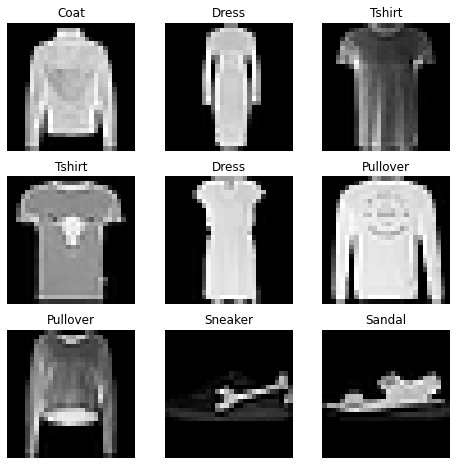

In [3]:
label_map = {
    0: 'Tshirt',
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",   
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size =(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## <span style="color:#4361EE">Creación de un conjunto de datos personalizado para sus archivos</span>

Una clase de conjunto de datos personalizada debe implementar tres funciones: `__init__, __len__ y __getitem__`. 

En este ejemplo, supongamos que las imágenes FashionMNIST se almacenan en un directorio `img_dir`, y sus etiquetas se almacenan por separado en un archivo CSV  `annotations_file`.

Las etiquetas (labels) en el archivo `annotation_file` lucirían como

In [4]:
import os
import pandas as pda
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __get_item__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label =  self.image_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
        

## <span style="color:#4361EE">Preparando sus datos para entrenamiento con DataLoaders</span>

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### <span style="color:#4CC9F0">Iterando a lo largo del DataLoader</span>

Cada iteración retorna un batch (`batch_size=64`) de datos (`train_features` y `train_labels`). Dado que *shuffle = True* en el ejemplo, todos los lotes de datos se mezclan. Un control más fino para establecer el orden se obtiene usando `Samplers`.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


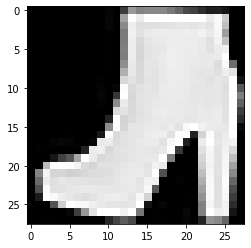

Label: 9


In [6]:
# Despliega imagen y etiqueta
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze() # primer elemento del batch
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')